In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns
import scipy.stats as stat
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Speed Dating Dataset


#### Data Set Link
https://data.world/annavmontoya/speed-dating-experiment


**project purposes**

    - predict classification of matches. Individuals are in a speed dating experiment. Each speed date is four minutes long. A match is classified as both individuals agree to go on a second date.
    - visualize attribute impacts and importance among different genders and age group.
    -
    

### LOAD DATA

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df_full=pd.read_csv('/Users/davidshi/Downloads/datingdata/SpeedDatingData.csv',encoding="ISO-8859-1")

In [4]:
df_full.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [5]:
df_full.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
df_full[['iid','pid']][(df_full['iid']==3)]

,iid,pid
20,3,11.0
21,3,12.0
22,3,13.0
23,3,14.0
24,3,15.0
25,3,16.0
26,3,17.0
27,3,18.0
28,3,19.0
29,3,20.0


In [7]:
df_full.shape

(8378, 195)

In [8]:
pd.options.display.max_rows = 10000
df_full.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
like_o       250
prob_o       318
met_o        385
age           95
field         63
field_cd      82
undergra    3464
mn_sat      5245
tuition     4795
race          63
imprace       79
imprelig      79
from          79
zipcode     1064
income      4099
goal          79
date          97
go_out        79
career        89
career_c     138
sports        79
tvsports      79
exercise      79
dining        79
museums       79
art           79
hiking        79
gaming        79
clubbing      

**so many null values. Let's create a second DataFrame representing each participant only once**

In [9]:
identity = ['iid','wave','age','gender']
df_age = df_full[identity].drop_duplicates().copy()

In [10]:
df_age.gender.value_counts(dropna=False)

1    277
0    274
Name: gender, dtype: int64

**1 = male**  
**0 = female**

### AGE DISTRIBUTION

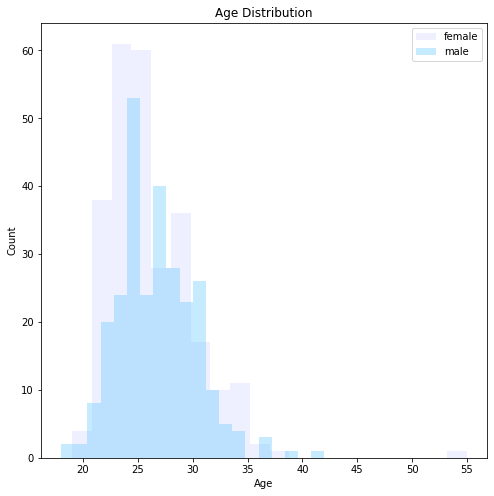

In [11]:
dfboy=df_age[df_age['gender']==1]
dfgirl=df_age[df_age['gender']==0]
plt.figure(figsize=(8,8))
plt.hist(dfgirl['age'],bins=20,color='#eeefff',alpha=1, label = 'female')
plt.hist(dfboy['age'],bins=20,color='#72CCFD',alpha=0.4, label = 'male')
plt.title('Age Distribution')
plt.ylabel('Count')
plt.xlabel('Age')
plt.legend(loc = 'upper right')


**Histogram of female is more right skewed than male. This means female average age is lower than male average age in this speed dating experiment. Women have more pressure to get married earlier from society because theres a stigma with single older women. In addition women have a shorter biological clock to mate due to decrease quality in eggs at older ages. There is a count difference due to the presence of Na's in the age column**

### Attribute Analysis by Visual

**Next I want to take a look at what attributes people think are most important. Participants were given a questionnaire before the speed date rounds. There is a section where participants are asked what they look for in the opposite sex. They are asked to allocated 100 points between 6 characteristics.**  

**intel1_1 : intelligence**  
**sinc1_1  : sincere**  
**attr1_1  : attractive**  
**fun1_1   : fun**  
**amb1_1   : ambition**   
**shar1_1  : shared interest**

Reference used to make radar charts
https://python-graph-gallery.com/391-radar-chart-with-several-individuals/

In [12]:
attribute = ['attractive', 'sincere','intelligence','fun','ambition','interest']
categories = ['attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']
df_want = df_full[['iid', 'wave', 'gender'] + categories].drop_duplicates().copy()

In [13]:
df_want.shape

(551, 9)

In [14]:
N = len(categories)
values=[df_want.attr1_1.mean(),
        df_want.sinc1_1.mean(),
        df_want.intel1_1.mean(),
        df_want.fun1_1.mean(),
        df_want.amb1_1.mean(),
        df_want.shar1_1.mean(),
        df_want.attr1_1.mean()]

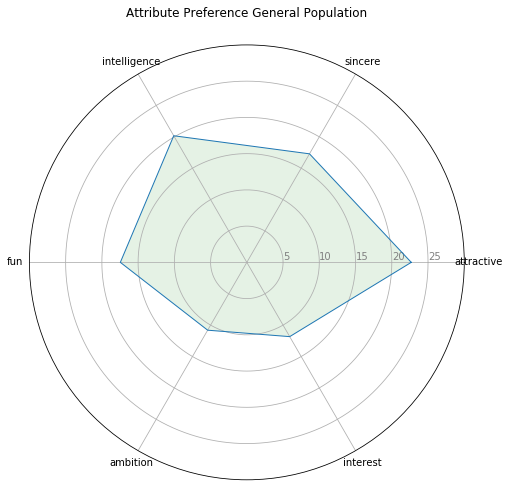

In [15]:
angles = [n/ float(N) * 2 * pi for n in range (N)]
angles += angles[:1]
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], attribute)
ax.set_rlabel_position(0)
plt.yticks([5,10,15,20,25], ['5','10','15','20','25'], color="grey", size=10)
plt.ylim(0,30)
plt.title('Attribute Preference General Population')
ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, 'g', alpha=0.1)

**Attractivness have the highest value compared to the other attributes. Intelligence came as a close second. Ambition and shared interest have the lowest value. Physical looks have a average close to 25/100. If we lived in a advanced world where people have total ratings, 25% of it will be based on physical appearance.**

In [16]:
values_m=[df_want[df_want['gender']==1].attr1_1.mean(),
        df_want[df_want['gender']==1].sinc1_1.mean(),
        df_want[df_want['gender']==1].intel1_1.mean(),
        df_want[df_want['gender']==1].fun1_1.mean(),
        df_want[df_want['gender']==1].amb1_1.mean(),
        df_want[df_want['gender']==1].shar1_1.mean(),
        df_want[df_want['gender']==1].attr1_1.mean()]

In [17]:
values_f=[df_want[df_want['gender']==0].attr1_1.mean(),
        df_want[df_want['gender']==0].sinc1_1.mean(),
        df_want[df_want['gender']==0].intel1_1.mean(),
        df_want[df_want['gender']==0].fun1_1.mean(),
        df_want[df_want['gender']==0].amb1_1.mean(),
        df_want[df_want['gender']==0].shar1_1.mean(),
        df_want[df_want['gender']==0].attr1_1.mean()]

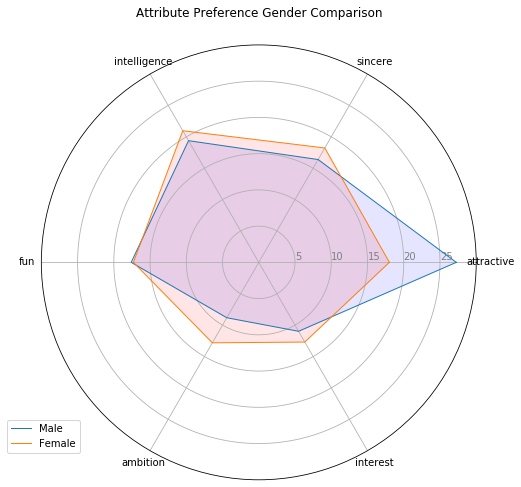

In [18]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], attribute)
ax.set_rlabel_position(0)
plt.yticks([5,10,15,20,25], ['5','10','15','20','25'], color="grey", size=10)
plt.ylim(0,30)
plt.title('Attribute Preference Gender Comparison')
ax.plot(angles, values_m, linewidth=1, linestyle='solid', label="Male")
ax.fill(angles, values_m, 'b', alpha=0.1)
ax.plot(angles, values_f, linewidth=1, linestyle='solid', label="Female")
ax.fill(angles, values_f, 'r', alpha=0.1)
plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))

**Men looks for attractivness, women look for intelligence. Are men really that shallow? This chart looks ridiculous. I guess I am very different from the average male, I value ambition to a large extent.**

**I want to make another interesting comparison, participants are asked what they think the OPPOSITE sex looks for. I want to see if participants prediction closely reflect to the truth.**

In [19]:
categories2 = ['attr2_1','sinc2_1','intel2_1','fun2_1','amb2_1','shar2_1']
df_want2 = df_full[['iid', 'wave', 'gender'] + categories2].drop_duplicates().copy()

In [20]:
values_m_pred=[df_want2[df_want2['gender']==1].attr2_1.mean(),
        df_want2[df_want2['gender']==1].sinc2_1.mean(),
        df_want2[df_want2['gender']==1].intel2_1.mean(),
        df_want2[df_want2['gender']==1].fun2_1.mean(),
        df_want2[df_want2['gender']==1].amb2_1.mean(),
        df_want2[df_want2['gender']==1].shar2_1.mean(),
        df_want2[df_want2['gender']==1].attr2_1.mean()]

In [21]:
values_f_pred=[df_want2[df_want2['gender']==0].attr2_1.mean(),
        df_want2[df_want2['gender']==0].sinc2_1.mean(),
        df_want2[df_want2['gender']==0].intel2_1.mean(),
        df_want2[df_want2['gender']==0].fun2_1.mean(),
        df_want2[df_want2['gender']==0].amb2_1.mean(),
        df_want2[df_want2['gender']==0].shar2_1.mean(),
        df_want2[df_want2['gender']==0].attr2_1.mean()]

**values_m_pred : what men think women looks for**   
**values_f_pred : what women think men look for**

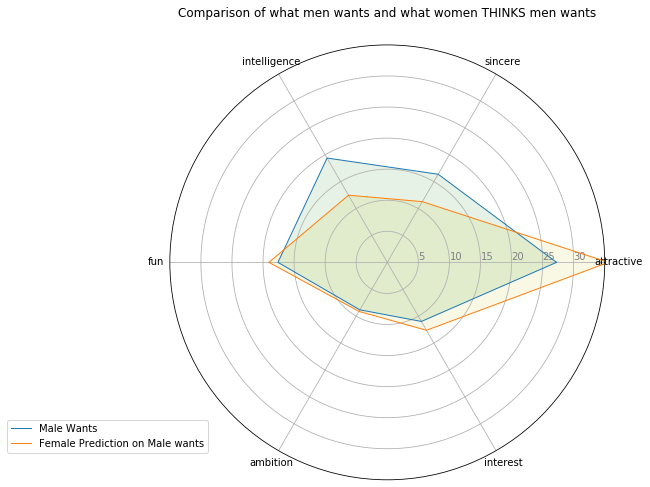

In [22]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], attribute)
ax.set_rlabel_position(0)
plt.yticks([5,10,15,20,25,30], ['5','10','15','20','25','30'], color="grey", size=10)
plt.ylim(0,35)
plt.title('Comparison of what men wants and what women THINKS men wants')
ax.plot(angles, values_m, linewidth=1, linestyle='solid', label="Male Wants")
ax.fill(angles, values_m, 'g', alpha=0.1)
ax.plot(angles, values_f_pred, linewidth=1, linestyle='solid', label="Female Prediction on Male wants")
ax.fill(angles, values_f_pred, 'y', alpha=0.1)
plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))

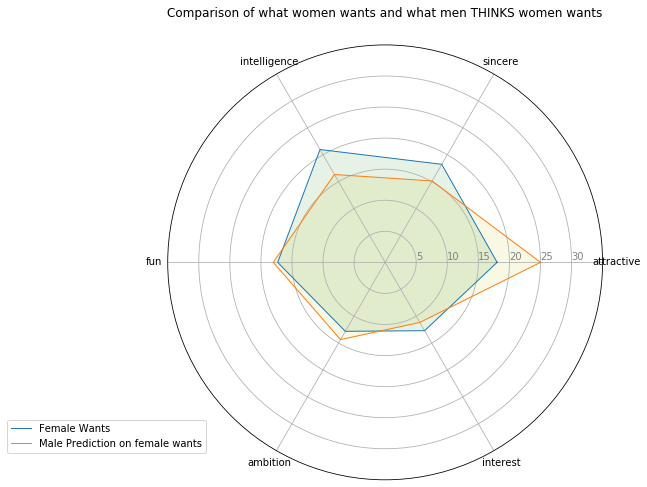

In [23]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], attribute)
ax.set_rlabel_position(0)
plt.yticks([5,10,15,20,25,30], ['5','10','15','20','25','30'], color="grey", size=10)
plt.ylim(0,35)
plt.title('Comparison of what women wants and what men THINKS women wants')
ax.plot(angles, values_f, linewidth=1, linestyle='solid', label="Female Wants")
ax.fill(angles, values_f, 'g', alpha=0.1)
ax.plot(angles, values_m_pred, linewidth=1, linestyle='solid', label="Male Prediction on female wants")
ax.fill(angles, values_m_pred, 'y', alpha=0.1)
plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))

**wow what a surprise. Both genders underestimated how much people value intelligence/sincerity and overestimated the importance of attractivenss. This is great news for all the ugly people out there!** 

### Attribute Analysis by Statistics


In [24]:
df_psy=df_full[['iid', 'wave','exphappy','age','field','field_cd','expnum','race']].drop_duplicates().copy()

In [25]:
df_psy=df_psy.set_index('iid')

In [26]:
temp = df_full.groupby(['iid']).count()

In [27]:
df_psy['# of dates'] = temp['id']

In [28]:
df_psy['# of yes'] = df_full.groupby(['iid']).dec_o.sum()

In [29]:
df_psy['success rate'] = df_psy['# of yes'] / df_psy['# of dates']

In [30]:
df_psy

,wave,exphappy,age,field,field_cd,expnum,race,# of dates,# of yes,success rate
iid,,,,,,,,,,
1,1,3.0,21.0,Law,1.0,2.0,4.0,10,5,0.500000
2,1,4.0,24.0,law,1.0,5.0,2.0,10,6,0.600000
3,1,4.0,25.0,Economics,2.0,2.0,2.0,10,5,0.500000
4,1,1.0,23.0,Law,1.0,2.0,2.0,10,6,0.600000
5,1,7.0,21.0,Law,1.0,10.0,2.0,10,3,0.300000
6,1,4.0,23.0,law,1.0,3.0,4.0,10,5,0.500000
7,1,7.0,22.0,Law,1.0,3.0,4.0,10,7,0.700000
8,1,6.0,25.0,Masters in Public Administration,13.0,10.0,2.0,10,8,0.800000
9,1,6.0,26.0,Masters in Public Administration,13.0,15.0,6.0,10,7,0.700000


In [31]:
df_psy['attr_o'] = df_full.groupby(['iid']).attr_o.sum() / df_psy['# of dates']
df_psy['sinc_o'] = df_full.groupby(['iid']).sinc_o.sum() / df_psy['# of dates']
df_psy['intel_o'] = df_full.groupby(['iid']).intel_o.sum() / df_psy['# of dates']
df_psy['fun_o'] = df_full.groupby(['iid']).fun_o.sum() / df_psy['# of dates']
df_psy['amb_o'] = df_full.groupby(['iid']).amb_o.sum() / df_psy['# of dates']
df_psy['shar_o'] = df_full.groupby(['iid']).shar_o.sum() / df_psy['# of dates']

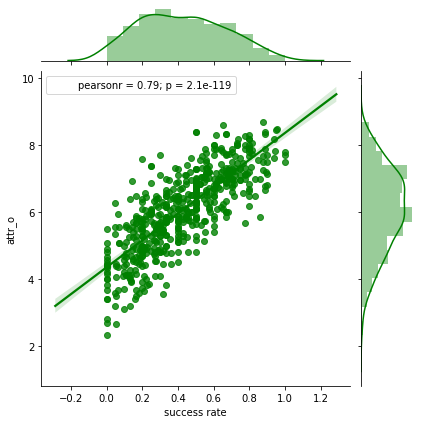

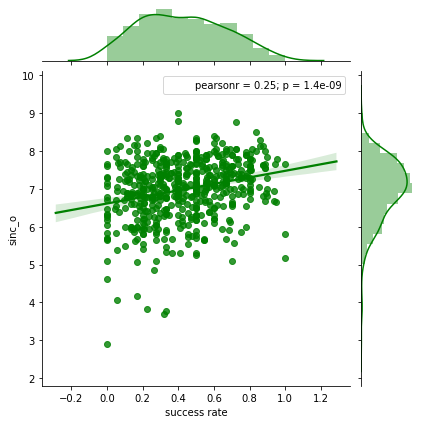

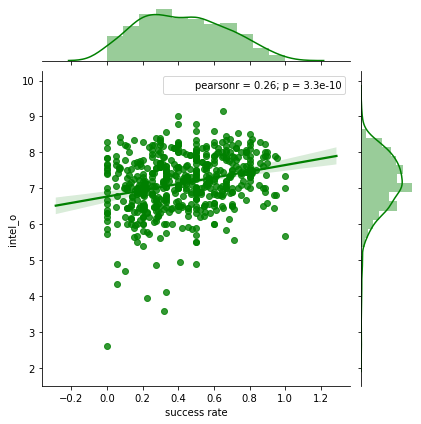

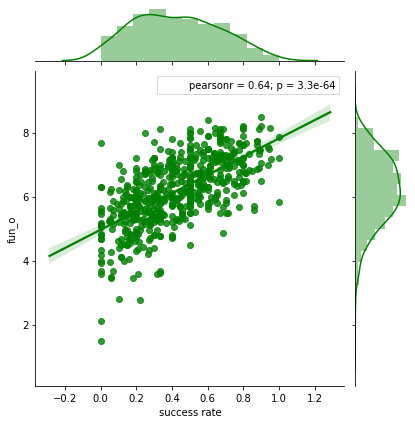

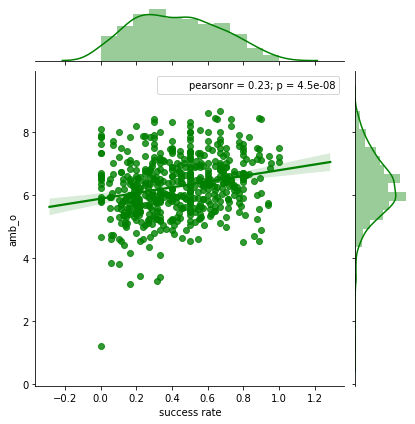

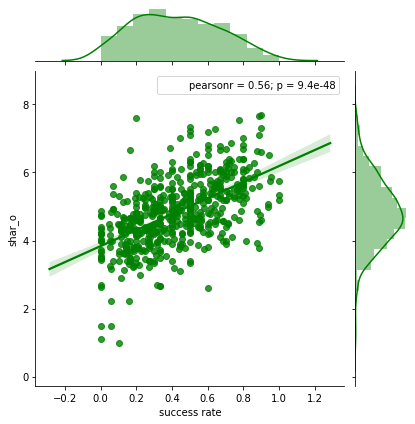

In [32]:
#figure, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(12,6))
sns.jointplot(x="success rate", y="attr_o", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)
sns.jointplot(x="success rate", y="sinc_o", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)
sns.jointplot(x="success rate", y="intel_o", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)
sns.jointplot(x="success rate", y="fun_o", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)
sns.jointplot(x="success rate", y="amb_o", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)
sns.jointplot(x="success rate", y="shar_o", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)

success rate is calculated: 

dec_o for unique iid ( number of people who said yes to the participant) / total row of data for unique iid (number of total dates)

characteristics is given by partner, each iid average given characteristics is plotted against success rate to find strength of linear relationship

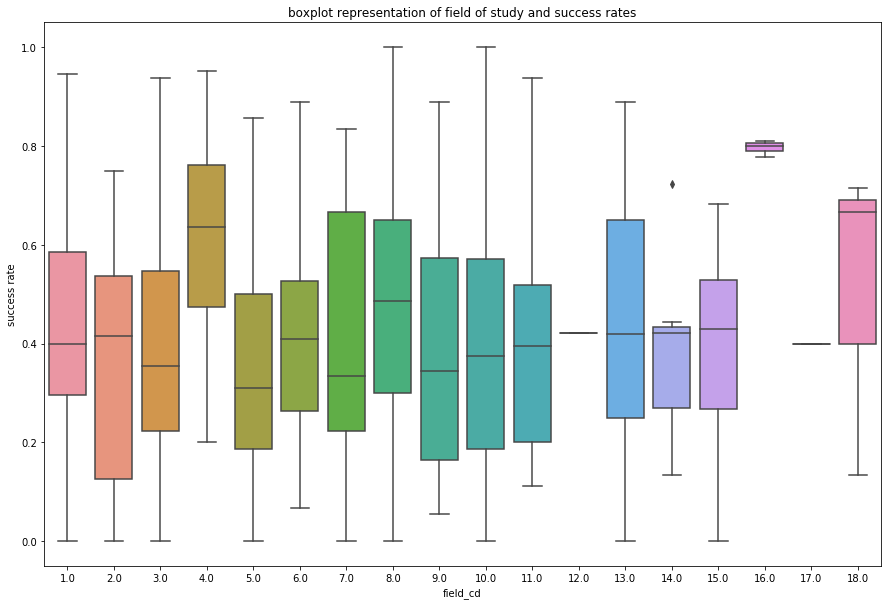

In [33]:
plt.figure(figsize=(15,10))
plt.title('boxplot representation of field of study and success rates')
sns.boxplot(x="field_cd", y="success rate", data=df_psy)

boxplot representation of success rate by field of study. #16 have low sample size so biased, #4 is languages.

In [34]:
df_psy['attr3_1'] = df_full.groupby(['iid']).attr3_1.sum() / df_psy['# of dates']
df_psy['sinc3_1'] = df_full.groupby(['iid']).sinc3_1.sum() / df_psy['# of dates']
df_psy['intel3_1'] = df_full.groupby(['iid']).intel3_1.sum() / df_psy['# of dates']
df_psy['fun3_1'] = df_full.groupby(['iid']).fun3_1.sum() / df_psy['# of dates']
df_psy['amb3_1'] = df_full.groupby(['iid']).amb3_1.sum() / df_psy['# of dates']

df_psy['rating self'] = (df_psy['attr3_1'] + df_psy['sinc3_1'] + df_psy['intel3_1'] + df_psy['fun3_1'] + 
                         df_psy['amb3_1']) / 5

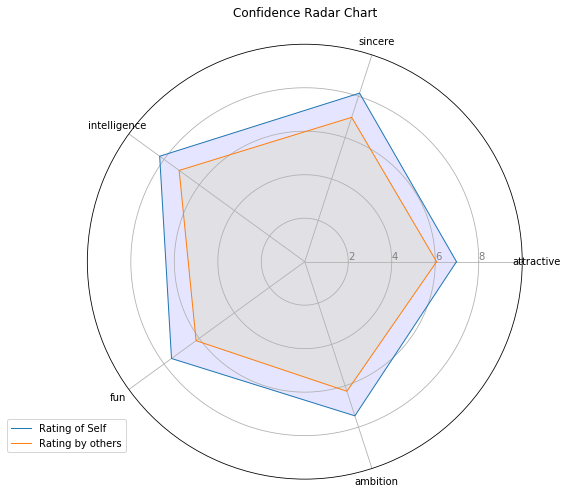

In [35]:
values_self=[df_psy.attr3_1.mean(),
        df_psy.sinc3_1.mean(),
        df_psy.intel3_1.mean(),
        df_psy.fun3_1.mean(),
        df_psy.amb3_1.mean(),
        df_psy.attr3_1.mean()]

values_rating=[df_psy.attr_o.mean(),
        df_psy.sinc_o.mean(),
        df_psy.intel_o.mean(),
        df_psy.fun_o.mean(),
        df_psy.amb_o.mean(),
        df_psy.attr_o.mean()]

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
angles = [n/ float(5) * 2 * pi for n in range (5)]
angles += angles[:1]
plt.xticks(angles[:-1], attribute)
ax.set_rlabel_position(0)
plt.yticks([2,4,6,8], ['2','4','6','8'], color="grey", size=10)
plt.ylim(0,10)
plt.title('Confidence Radar Chart')
ax.plot(angles, values_self, linewidth=1, linestyle='solid', label="Rating of Self")
ax.fill(angles, values_self, 'b', alpha=0.1)
ax.plot(angles, values_rating, linewidth=1, linestyle='solid', label="Rating by others")
ax.fill(angles, values_rating, 'y', alpha=0.1)
plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))

In [36]:
df_psy['rating avg'] = (df_psy['attr_o'] + df_psy['sinc_o'] + df_psy['intel_o'] + df_psy['fun_o'] + df_psy['amb_o']
                        ) / 5

In [37]:
df_psy['confidence level'] = df_psy['rating self'] / df_psy['rating avg']

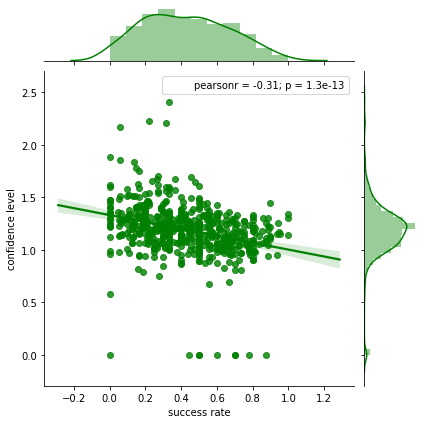

In [38]:
sns.jointplot(x="success rate", y="confidence level", data=df_psy, color = 'g', kind="reg",stat_func=stat.pearsonr)

Text(0.5, 1.0, 'Race Ambition')

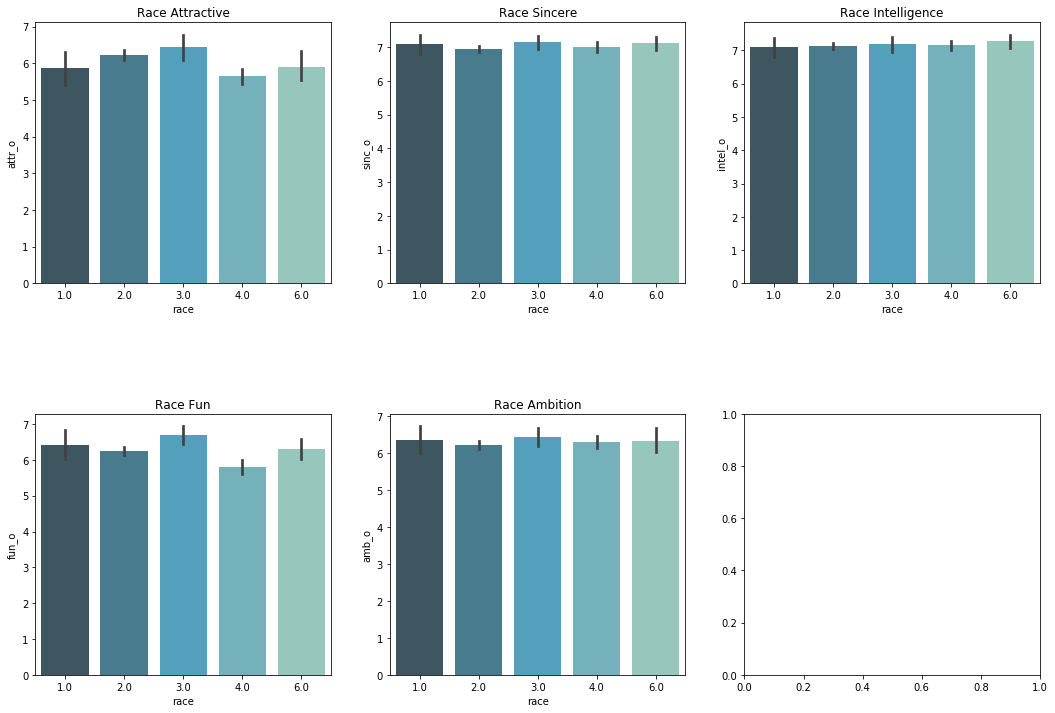

In [39]:
fig, ax = plt.subplots(2, 3,figsize=(18,12))
plt.subplots_adjust(hspace=0.5)
sns.barplot(x="race", y="attr_o", data=df_psy, palette = 'GnBu_d',ax=ax[0,0])
ax[0,0].set_title('Race Attractive')
sns.barplot(x="race", y="sinc_o", data=df_psy, palette = 'GnBu_d',ax=ax[0,1])
ax[0,1].set_title('Race Sincere')
sns.barplot(x="race", y="intel_o", data=df_psy, palette = 'GnBu_d',ax=ax[0,2])
ax[0,2].set_title('Race Intelligence')
sns.barplot(x="race", y="fun_o", data=df_psy, palette = 'GnBu_d',ax=ax[1,0])
ax[1,0].set_title('Race Fun')
sns.barplot(x="race", y="amb_o", data=df_psy, palette = 'GnBu_d',ax=ax[1,1])
ax[1,1].set_title('Race Ambition')

age diff x int_corr

In [40]:
df_full['agediff'] = abs(df_full['age_o'] - df_full['age'])

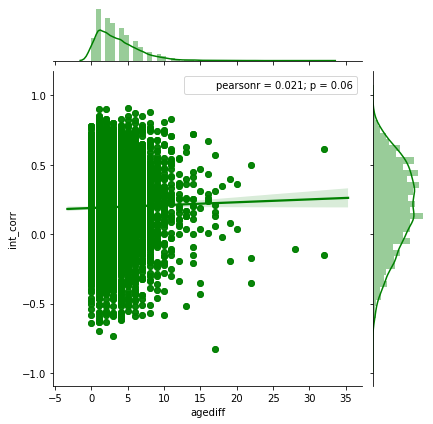

In [41]:
sns.jointplot(x="agediff", y='int_corr', data=df_full, color = 'g', kind="reg",stat_func=stat.pearsonr)

In [42]:
dftemp=df_full.dropna(subset=['int_corr','pid','age_o','age','race','race_o'])
dftemp = dftemp[dftemp['int_corr']!=0].copy()

In [43]:
dftemp.shape

(8074, 196)

In [44]:
dftemp['pair_val'] = (dftemp['iid']*dftemp['pid']+dftemp['race']+dftemp['race_o']+
                      (dftemp['int_corr']*dftemp['int_corr'])+(dftemp['age']*dftemp['age_o']))

In [45]:
dftemp=dftemp.sort_values(by=['pair_val','gender'])

In [46]:
dftemp.pivot_table(index=['pair_val'],aggfunc = 'size').max()

4

In [47]:
dftemp.pivot_table(index=['pair_val'],aggfunc = 'size').min()

2

In [48]:
dftemp.groupby('pair_val').filter(lambda x : len(x)>2)[['iid','pid','pair_val','gender']]

,iid,pid,pair_val,gender
55,6,16.0,677.0361,0
60,7,11.0,677.0361,0
106,11,7.0,677.0361,1
155,16,6.0,677.0361,1
387,32,51.0,2259.1681,0
393,33,41.0,2259.1681,0
535,41,33.0,2259.1681,1
724,51,32.0,2259.1681,1
1981,147,163.0,24643.2601,0
2056,152,158.0,24643.2601,0


In [49]:
dftemp.groupby('pair_val').filter(lambda x : len(x)<3)[['iid','pid','pair_val','gender']]

,iid,pid,pair_val,gender
1,1,12.0,480.2916,0
110,12,1.0,480.2916,1
2,1,13.0,483.0256,0
120,13,1.0,483.0256,1
3,1,14.0,503.3721,0
130,14,1.0,503.3721,1
4,1,15.0,526.0441,0
140,15,1.0,526.0441,1
9,1,20.0,530.1296,0
190,20,1.0,530.1296,1


In [50]:
dftemp = dftemp.groupby('pair_val').filter(lambda x : len(x)<3)

In [51]:
left = dftemp[~dftemp.pair_val.duplicated(keep='first')]

In [52]:
right = dftemp[~dftemp.pair_val.duplicated(keep='last')]

In [53]:
left.shape

(4031, 197)

In [54]:
right.shape

(4031, 197)

In [55]:
left['iid'].sum()

1114310

In [56]:
right['pid'].sum()

1114310.0

In [57]:
pd.options.display.max_rows = 100
left[['iid','pid']]

,iid,pid
1,1,12.0
2,1,13.0
3,1,14.0
4,1,15.0
9,1,20.0
...,...,...
7891,530,550.0
7849,528,552.0
7871,529,552.0
7892,530,551.0


In [58]:
right[['iid','pid']]

,iid,pid
110,12,1.0
120,13,1.0
130,14,1.0
140,15,1.0
190,20,1.0
...,...,...
8333,550,530.0
8375,552,528.0
8376,552,529.0
8355,551,530.0


In [59]:
left['gender'].max()


0

In [60]:
right['gender'].max()

1

In [61]:
right = right.rename(columns={'iid':'iidM','attr_o':'attr_o2','sinc_o':'sinc_o2','intel_o':'intel_o2'
                              ,'fun_o':'fun_o2','amb_o':'amb_o2'
                      ,'shar_o':'shar_o2'
                      ,'age':'ageM','race':'raceM','dec_o':'dec_o2','goal':'goalM'
                      ,'date':'dateM', 'go_out':'go_outM'
                      ,'attr1_1':'attr1_1M','sinc1_1':'sinc1_1M','intel1_1':'intel1_1M','fun1_1':'fun1_1M',
                      'amb1_1':'amb1_1M','shar1_1':'shar1_1M'})

In [62]:
rightdf = right[['pair_val','iidM','attr_o2','sinc_o2','intel_o2','fun_o2','amb_o2','shar_o2','ageM'
                 ,'raceM','dec_o2','goalM','dateM',
              'go_outM','attr1_1M','sinc1_1M','intel1_1M','fun1_1M','amb1_1M','shar1_1M']]

In [63]:
rightdf.isnull().sum()

pair_val       0
iidM           0
attr_o2       87
sinc_o2      114
intel_o2     133
fun_o2       168
amb_o2       343
shar_o2      556
ageM           0
raceM          0
dec_o2         0
goalM          0
dateM         18
go_outM        0
attr1_1M       0
sinc1_1M       0
intel1_1M      0
fun1_1M        9
amb1_1M        9
shar1_1M       9
dtype: int64

In [64]:
leftdf = left[['match','pair_val','int_corr','iid','attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','age'
               ,'race','dec_o','goal','date',
              'go_out','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1','shar1_1']]

In [65]:
dfml = leftdf.merge(rightdf,on =  'pair_val',how='left')

In [66]:
dfml.isnull().sum()

match          0
pair_val       0
int_corr       0
iid            0
attr_o        88
sinc_o       132
intel_o      134
fun_o        151
amb_o        332
shar_o       467
age            0
race           0
dec_o          0
goal           0
date           0
go_out         0
attr1_1        0
sinc1_1        0
intel1_1       0
fun1_1         0
amb1_1         0
shar1_1       22
iidM           0
attr_o2       87
sinc_o2      114
intel_o2     133
fun_o2       168
amb_o2       343
shar_o2      556
ageM           0
raceM          0
dec_o2         0
goalM          0
dateM         18
go_outM        0
attr1_1M       0
sinc1_1M       0
intel1_1M      0
fun1_1M        9
amb1_1M        9
shar1_1M       9
dtype: int64

In [67]:
dfml.shape

(4031, 41)

In [68]:
dfml.match.sum() / 4031 #looking for % match

0.16497147109898289

In [69]:
( len(dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)]) ) / 4031   # rejected girls

0.20267923592160755

In [70]:
( len(dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)]) ) / 4031   #guys

0.30960059538576035

In [71]:
( len(dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==0)]) ) / 4031  #no interest from both sides

0.3227486975936492

In [72]:
rej_f_atr=[  dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].attr_o.mean(),
             dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].sinc_o.mean(),
             dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].intel_o.mean(),
             dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].fun_o.mean(),
             dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].amb_o.mean(),
             dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].shar_o.mean(),
             dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].attr_o.mean()
            ]

In [73]:
f_atr=[      dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].attr_o.mean(),
             dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].sinc_o.mean(),
             dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].intel_o.mean(),
             dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].fun_o.mean(),
             dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].amb_o.mean(),
             dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].shar_o.mean(),
             dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].attr_o.mean()
            ]

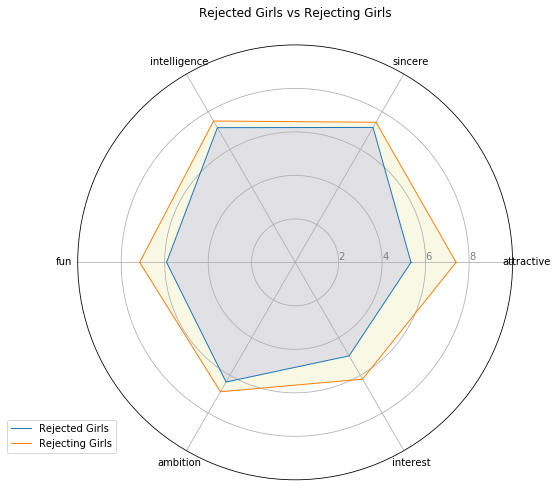

In [74]:
plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
angles = [n/ float(6) * 2 * pi for n in range (6)]
angles += angles[:1]
plt.xticks(angles[:-1], attribute)
ax.set_rlabel_position(0)
plt.yticks([2,4,6,8], ['2','4','6','8'], color="grey", size=10)
plt.ylim(0,10)
plt.title('Rejected Girls vs Rejecting Girls')
ax.plot(angles, rej_f_atr, linewidth=1, linestyle='solid', label="Rejected Girls")
ax.fill(angles, rej_f_atr, 'b', alpha=0.1)
ax.plot(angles, f_atr, linewidth=1, linestyle='solid', label="Rejecting Girls")
ax.fill(angles, f_atr, 'y', alpha=0.1)
plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))

the diff between two group of girls is attractiveness, fun and interest.

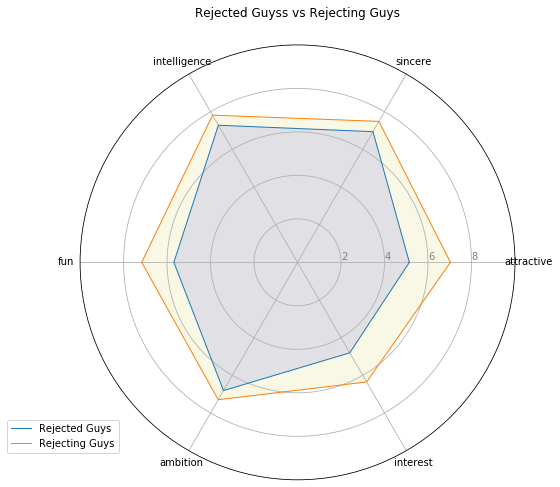

In [75]:
rej_m_atr=[  dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].attr_o2.mean(),
             dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].sinc_o2.mean(),
             dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].intel_o2.mean(),
             dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].fun_o2.mean(),
             dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].amb_o2.mean(),
             dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].shar_o2.mean(),
             dfml[(dfml['dec_o']==1) & (dfml['dec_o2']==0)].attr_o2.mean()
            ]

m_atr=[      dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].attr_o2.mean(),
             dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].sinc_o2.mean(),
             dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].intel_o2.mean(),
             dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].fun_o2.mean(),
             dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].amb_o2.mean(),
             dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].shar_o2.mean(),
             dfml[(dfml['dec_o']==0) & (dfml['dec_o2']==1)].attr_o2.mean()
            ]

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
angles = [n/ float(6) * 2 * pi for n in range (6)]
angles += angles[:1]
plt.xticks(angles[:-1], attribute)
ax.set_rlabel_position(0)
plt.yticks([2,4,6,8], ['2','4','6','8'], color="grey", size=10)
plt.ylim(0,10)
plt.title('Rejected Guyss vs Rejecting Guys')
ax.plot(angles, rej_m_atr, linewidth=1, linestyle='solid', label="Rejected Guys")
ax.fill(angles, rej_m_atr, 'b', alpha=0.1)
ax.plot(angles, m_atr, linewidth=1, linestyle='solid', label="Rejecting Guys")
ax.fill(angles, m_atr, 'y', alpha=0.1)
plt.legend(loc='right', bbox_to_anchor=(0.1, 0.1))

In [76]:
dfml = dfml.dropna(subset = ['dateM']).copy()

In [77]:
dfml = dfml.fillna(dfml.mean())

In [78]:
y = dfml['match']

In [79]:
X = dfml.drop(columns=['match', 'dec_o','dec_o2'])

In [80]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2, random_state=0)
clf = LogisticRegression(random_state=0)
model = clf.fit(X,y)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [81]:
accuracy_score(ytrain, pred_train)

0.8501557632398754

In [82]:
accuracy_score(ytest, pred_test)

0.8841843088418431